<a href="https://colab.research.google.com/github/prosvirinKir/Numerical-Linear-Algebra/blob/main/NLA_HW3_ProsvirinKV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [ ]:
# Your solution is here

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

Let $\mathbf{B}=\left[\begin{array}{ccc}{b}_{1} & {b}_{2} \cdots & {b}_{n}\end{array}\right]$ (of size $m \times n$ ) and $\mathbf{X}=\left[x_{1} x_{2} \cdots x_{m}\right]$. 

Then, the $k$-th column of $\mathbf{A X B}$ is
$$
\begin{aligned}
({A} {X} {B})_{:, k} &={A} {X} {b}_{k}={A} \sum_{i=1}^{m} {x}_{i} b_{i, k} =
\left[
    b_{1, k} {A} b_{2 . k} {A} \cdots b_{m, k} {A}
\right]
\underbrace{\left[
    \begin{array}{c}
    {x}_{1} \\
    {x}_{2} \\
    \vdots \\
    {x}_{m}
    \end{array}
\right]}_{\operatorname{vec}({\mathbf{X}})}= \\
&=(\underbrace{\left[b_{1, k}, b_{2, k}, \ldots, b_{m, k}\right]}_{{b}_{k}^{T}} \otimes {A}) \operatorname{vec}(\mathbf{X})
\end{aligned}
$$
Stacking the columns together
$$
\begin{aligned}
\operatorname{vec}(\boldsymbol{A} \boldsymbol{X} \boldsymbol{B}) &=\left[\begin{array}{c}
(\boldsymbol{A} \boldsymbol{X} \boldsymbol{B})_{:, 1} \\
(\boldsymbol{A} \boldsymbol{X} \boldsymbol{B})_{:, 2} \\
\vdots \\
(\boldsymbol{A} \boldsymbol{X} \boldsymbol{B})_{:, n}
\end{array}\right]=\left[\begin{array}{c}
\boldsymbol{b}_{1}^{T} \otimes \boldsymbol{A} \\
\boldsymbol{b}_{2}^{T} \otimes \boldsymbol{A} \\
\vdots \\
\boldsymbol{b}_{n}^{T} \otimes \boldsymbol{A}
\end{array}\right] \operatorname{vec}(\boldsymbol{X})=\left(\boldsymbol{B}^{T} \otimes \boldsymbol{A}\right) \operatorname{vec}(\boldsymbol{X})
\end{aligned}
$$
$$$$
In case of rows we have:
$(AXB)_k = (a_kX)B = \sum_{i=1}^{m} a_{ki} x_i \cdot B = \sum_{i=1}^{m} x_i (a_{ki} B) = vec(X) \cdot ([a_{k1}, \ldots, a_{km}] \otimes B) = vec(X) \cdot (A_k^{T} \otimes B) \Longrightarrow \mathrm{vec}(AXB) = vec(X) \cdot (A^{T} \otimes B)$



- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

Since $A \in \mathbb{R}_{n \times m}$, 
$B \in \mathbb{R}_{k \times l}, 
X \in \mathbb{R}_{l \times m},
x \in \mathbb{R}_{lm \times 1}
\Longrightarrow $ shape of $ A \otimes B $ is $ nk\times ml $

Therefore, complexity of $(A \otimes B)x$ is $\mathcal{O}(nkml)$.
$$$$

To reduce the complexity we can use results from previous task:
$ (A \otimes B) \mbox{vec}(X) = \mbox{vec}(BXA^T) $,

where $ \mathrm{vec(\mathbf{X})} \in \mathbb{R}_{lm \times 1}$.

So, $(A \otimes B) x=(A \otimes B) \operatorname{vec}(x)=\operatorname{vec}
\left(B \operatorname{vec}^{-1}(x) A^{T}\right)$, where $v e c^{-1}$ is an inverse transformation from vector to matrix. And the complexity is just $\mathcal{O}(klm+mkn) $



- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

From lectures we know some Kron product roperties:
1. $A \otimes (B + C) = (A \otimes B) + (A \otimes C)$
2. $(A \otimes B)(C \otimes D) = (AC \otimes BD)$


$$
A \otimes I+I \otimes B=S_{A} \Lambda_{A} S_{A}^{-1} \otimes I+I \otimes S_{B} \Lambda_{B} S_{B}^{-1}=S_{A} \Lambda_{A} S_{A}^{-1} \otimes S_{B} S_{B}^{-1}+S_{A} S_{A}^{-1} \otimes S_{B} \Lambda_{B} S_{B}^{-1}=\left(S_{A} \Lambda_{A} \otimes S_{B}+S_{A} \otimes S_{B} \Lambda_{B}\right)\left(S_{A}^{-1} \otimes S_{B}^{-1}\right)=\left(S_{A} \otimes S_{B}\right)\left(\Lambda_{A}\otimes I+I \otimes \Lambda_{B}\right)\left(S_{A}^{-1} \otimes S_{B}^{-1}\right)=\left(S_{A} \otimes S_{B}\right)\left(\Lambda_{A} \otimes I+I \otimes \Lambda_{B}\right)\left(S_{A} \otimes S_{B}\right)^{-1}
$$

So, we have 
\begin{array}{l}
\text { So, } A \otimes I+I \otimes B=\left(S_{A} \otimes S_{B}\right)\left(\Lambda_{A} \otimes I+I \otimes \Lambda_{B}\right)\left(S_{A} \otimes S_{B}\right)^{-1}=S \Lambda S^{-1}
\end{array}

Hince, eigenvectors of the given matrix are the columns in matrix $S=S_{A} \otimes S_{B}$ and the eigenvalues are $\lambda_{A}^{i}+\lambda_{B}^{j}$ for $1 \leq i \leq n, 1 \leq j \leq n$





- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

**Richardson**

From the lectures we know that $||e_k||_2 \leq q^k ||e_0||_2 $, 
where $q = \frac{cond(A)-1}{cond(A)+1}$

Relative accuracy is $\varepsilon = \frac{||e_k||_2}{||e_0||_2} = 10^{-4}$ then we get that $\left(\frac{10^6-1}{10^6+1}\right)^k = 10^{-4}$, hince $k \geq 4605000$.
$$$$

**Chebyshev**
    
Relative accuracy is  $\varepsilon = \frac{||e_k||_2}{||e_0||_2} = 10^{-4}$
then we get that 
$(\frac{10^3-1}{10^3+1})^k = 10^{-4}$, hince $k \geq 4606$.
$$$$

**Conjugate gradient**

$
\frac{\|x_k - x_* \|_A}{\| x_* \|_A} \leq 2 \Big( \frac{\sqrt{\mbox{cond}(A)} - 1}{\sqrt{\mbox{cond}(A)} + 1} \Big)^k $

$ -4 \leq \log{2 \left( \frac{999}{1001} \right)^k }= \log 2 + 
 \log{\frac{999}{1001}} $

$ -4 - \log 2 \leq k \log\frac{999}{1001} $

$k \geq \frac{-4 \log 2}{\log\frac{999}{1001}}  = 4952$



In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [ ]:
# Your solution is here

In [ ]:
# Alexandr sad that we can use CG from scipy

In [ ]:
A = np.diagflat([i / 1000 for i in range(1, 1001)]+[1000])
l_max = 1000
l_min = 0.001
tau = 2.0/(l_max + l_min)

In [ ]:
def richardson(A, num_iters, tau):
    res = []
    x = np.zeros(A.shape[1])
    for i in tqdm(range(num_iters)): 
        err = A.dot(x) - np.ones(A.shape[1])
        x = x - tau * err
        res.append(np.linalg.norm(err / err_0))
        if np.linalg.norm(err) < 1e-4:
            return res
    return res

In [ ]:
res_richardson = richardson(A, 4605170, tau)

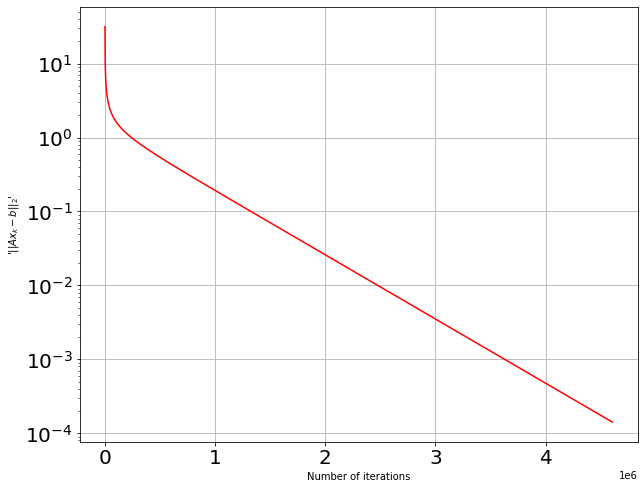

In [ ]:
plt.figure(figsize=(10, 8))
plt.semilogy(res_richardson, color='red', label=f'Richardson, num_iter={len(res_richardson)}')
plt.xlabel("Number of iterations", fontsize=10)
plt.ylabel("'$||Ax_k - b||_2$'", fontsize=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [ ]:
num_iters = 8192 # Actually, we got 4606, but we want power of two, that's why 8192
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * num_iters)) for i in range(num_iters)]
taus = [(l_max + l_min - (l_min - l_max) * r) / 2 for r in roots]
x = np.zeros(A.shape[1])
result = A.dot(x) - np.ones(A.shape[1])
Chebyshev_list = [np.linalg.norm(result)]

# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

# we do permutation in order to the method will be stable, because the norm of the product should be small
good_perm = good_shuffle([i for i in range(1, num_iters+1)])

for i in range(num_iters):
    x = x - 1.0/taus[good_perm[i] - 1] * result
    result = A.dot(x) - np.ones(A.shape[1])
    Chebyshev_list.append(np.linalg.norm(result))
    if np.linalg.norm(result) < 1e-4:
        break

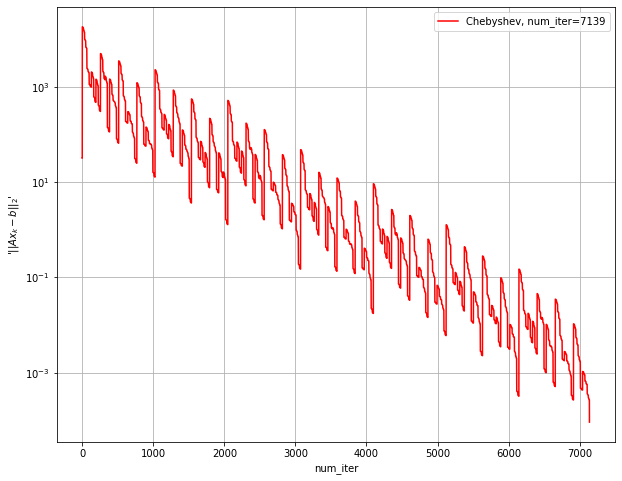

In [ ]:
plt.figure(figsize=(10, 8))

plt.semilogy(Chebyshev_list, color='red', label=f'Chebyshev, num_iter={len(Chebyshev_list)}')
plt.ylabel("'$||Ax_k - b||_2$'")
plt.xlabel("num_iter")

plt.legend()
plt.grid()
plt.show()

In [ ]:
import scipy.sparse.linalg

In [ ]:
cg_list = []
b = np.random.randn(A.shape[0])
x, info = scipy.sparse.linalg.cg(A, b, x0=b, tol=1e-4, callback=lambda x: cg_list.append(np.linalg.norm(A @ x - b) / np.linalg.norm(b)))

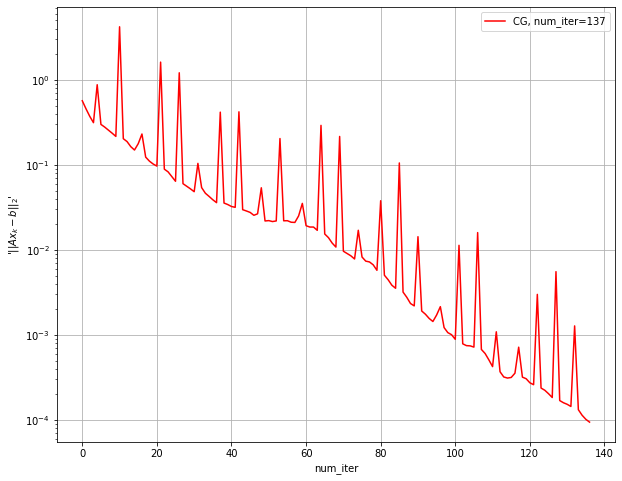

In [ ]:
plt.figure(figsize=(10, 8))

plt.semilogy(cg_list, color='red', label=f'CG, num_iter={len(cg_list)}')
plt.ylabel("'$||Ax_k - b||_2$'")
plt.xlabel("num_iter")

plt.legend()
plt.grid()
plt.show()

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

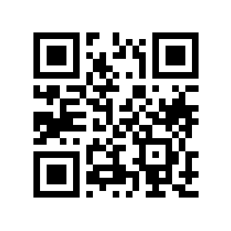

In [ ]:
# import matplotlib.pyplot as plt
# x = plt.imread('qrcode.gif')[:,:,0]
# n = x.shape[0]
# plt.imshow(x, cmap="gray")
# plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [ ]:
import numpy as np
from scipy.fft import fft2, ifft2
import scipy.sparse.linalg as spla

In [ ]:

def T_matvec(x, alpha):
    n = int(x.shape[0]**0.5)
    x_full = np.zeros((2*n, 2*n))
    x_full[:n, :n] = x.reshape(n, n)

    t = np.exp(-alpha * np.array(list(range(n)) + [0] + list(range(n - 1, 0, -1)))**2)
    T = t[:, None] @ t[None, :]

    y = alpha / np.pi * ifft2(fft2(T) * fft2(x_full))[:n,:n]

    return y.real.reshape(1, -1)
    


n = x.shape[0]
alpha = 0.1
T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
# your code is here

(-0.5, 329.5, 329.5, -0.5)

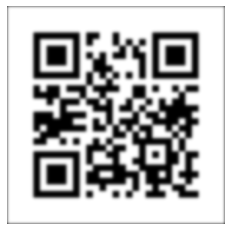

In [ ]:
plt.imshow(T.dot(x.reshape(-1)).reshape(n, n), cmap="gray")
plt.axis("off")

In [ ]:
x.shape

(330, 330)

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [ ]:
from scipy.sparse.linalg import cg

In [ ]:
# your code is here
alpha_arr = [0.1, 0.01, 0.001]
tol_arr = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]


for a in alpha_arr:
  print(f'alpha: {a}')
  for tol in tol_arr:
    print(f'\ttol: {tol}')
    cg_list = []
    T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, a))
    y = T.dot(x.reshape(-1))
    out = cg(T, y, tol=tol, maxiter=3000, callback=lambda ans: cg_list.append(np.linalg.norm(ans - x.reshape(-1)) / np.linalg.norm(x)))
    print(f'\t num_iter = {len(cg_list)}, e = {cg_list[-1]}')



alpha: 0.1
	tol: 0.001
	 num_iter = 11, e = 0.12847145208381072
	tol: 0.0001
	 num_iter = 46, e = 0.1019143136108824
	tol: 1e-05
	 num_iter = 136, e = 0.09586763786282956
	tol: 1e-06
	 num_iter = 788, e = 0.07218294984063495
	tol: 1e-07
	 num_iter = 2419, e = 0.06672488966988452
alpha: 0.01
	tol: 0.001
	 num_iter = 18, e = 0.2151919309181166
	tol: 0.0001
	 num_iter = 53, e = 0.20193916147302193
	tol: 1e-05
	 num_iter = 168, e = 0.1971795196159429
	tol: 1e-06
	 num_iter = 542, e = 0.19494860287635443
	tol: 1e-07
	 num_iter = 2355, e = 0.18986861502547475
alpha: 0.001
	tol: 0.001
	 num_iter = 13, e = 0.43627179661633736
	tol: 0.0001
	 num_iter = 49, e = 0.41985444641893716
	tol: 1e-05
	 num_iter = 159, e = 0.40010636299158153
	tol: 1e-06
	 num_iter = 514, e = 0.3804794506411201
	tol: 1e-07
	 num_iter = 1461, e = 0.36964508437729


The only reason it does not converge on a computer are round-off errors, in particular if the condition number of the matrix is large. In other words, matrix is ill-conditioned matrix.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [ ]:
# your code is here
alpha = 0.01
tol = 1e-5
cg_list = []
T = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))
y = T.dot(x.reshape(-1))
y_hat = y + np.random.randn(y.shape[0])

out = cg(T, y_hat, tol=tol, maxiter=3000, callback=lambda ans: cg_list.append(np.linalg.norm(ans - x.reshape(-1)) / np.linalg.norm(x)))
print(f'\t num_iter = {len(cg_list)}, e = {cg_list[-1]}')

	 num_iter = 3000, e = 11863386.072441658


The drawback can be if some assumptions on the preconditioner is violated, the behavior of the preconditioned conjugate gradient method may become unpredictable.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [ ]:
def T_lmbda_matvec(x, aplha, lmbda):
    n = int(x.shape[0]**0.5)
    x_full = np.zeros((2*n, 2*n))
    x_full[:n, :n] = x.reshape(n, n)

    t = np.exp(-alpha * np.array(list(range(n)) + [0] + list(range(n - 1, 0, -1)))**2)
    T = t[:, None] @ t[None, :] + lmbda**2 * np.eye(2*n)

    y = alpha / np.pi * ifft2(fft2(T) * fft2(x_full))[:n,:n]

    return y.real.reshape(1, -1)

# your code is here

In [ ]:
lmbda_arr = [10, 1, 0.1]
tol_arr = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]


for l in lmbda_arr:
  print(f'lmbda: {l}')
  for tol in tol_arr:
    print(f'\ttol: {tol}')
    cg_list = []
    T = spla.LinearOperator((n**2, n**2), matvec = lambda x: T_lmbda_matvec(x, alpha, l))
    y = T.dot(x.reshape(-1))
    y_hat = y + np.random.randn(y.shape[0])
    out = cg(T, y_hat, tol=tol, maxiter=3000, callback=lambda ans: cg_list.append(np.linalg.norm(ans - x.reshape(-1)) / np.linalg.norm(x)))
    print(f'\t num_iter = {len(cg_list)}, e = {cg_list[-1]}')

lmbda: 10
	tol: 0.001
	 num_iter = 1, e = 0.5429177946920252
	tol: 0.0001
	 num_iter = 1, e = 0.5429177944228347
	tol: 1e-05
	 num_iter = 2, e = 0.38094087884238964
	tol: 1e-06
	 num_iter = 5, e = 0.2953354221980413
	tol: 1e-07
	 num_iter = 3000, e = 6186848.820099579
lmbda: 1
	tol: 0.001
	 num_iter = 2, e = 0.38086643876557985
	tol: 0.0001
	 num_iter = 4, e = 0.2952978069902279
	tol: 1e-05
	 num_iter = 3000, e = 7785767.9480978865
	tol: 1e-06
	 num_iter = 3000, e = 8542968.770404104
	tol: 1e-07
	 num_iter = 3000, e = 7444681.687351868
lmbda: 0.1
	tol: 0.001
	 num_iter = 3000, e = 10188139.260756351
	tol: 0.0001


KeyboardInterrupt: ignored

On the first iterations it works much faster, but after I execute cell again it does not converge for some reason, maybe collab cpu...

Due to the fact that we use Tikhonov's regularization, that is, we use not an exact matrix the result is inaccurate.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    n = int(x.shape[0]**0.5)
    x_full = np.zeros((2*n, 2*n))
    x_full[:n, :n] = x.reshape(n, n)

    t = np.exp(-alpha * np.array(list(range(n)) + [0] + list(range(n - 1, 0, -1)))**2)
    c = t[:None] @ t[None:] + lmbda**2 * np.eye(2*n)
    
    c_inv_x = ifft2(fft2(1 / c) * fft2(x_full))[:n, :n]

    return c_inv_x.real.reshape(-1)

In [ ]:
cg_list
alpha = 0.01
lmbda = 1
tol = 1e-3

C_inv = spla.LinearOperator((n**2, n**2), matvec = lambda x: C_inv_matvec(x, alpha, lmbda))
T = spla.LinearOperator((n**2, n**2), matvec = lambda x: T_lmbda_matvec(x, alpha, lmbda))

y = T.dot(x.reshape(-1))
y_hat = y + np.random.randn(y.shape[0])

A = C_inv.dot(T)
out_ = cg(A, y_hat, tol=tol, maxiter=3000)[0]

out = cg(np.linalg.inv(C_inv), out_, tol=tol, maxiter=3000, callback=lambda ans: cg_list.append(np.linalg.norm(ans - x.reshape(-1)) / np.linalg.norm(x)))